In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import cv2
import numpy as np

def extract_features(image_path, bins=8):
    img = cv2.imread(image_path) # channels in order BGR
    img = cv2.resize(img, (170, 170))
    features = {}
    
    # Color features (mean, std, median)

    for i, color in enumerate(['blue', 'green', 'red']):
        channel = img[:,:,i]
        
        features[f'{color}_mean'] = np.mean(channel)
        features[f'{color}_std'] = np.std(channel)
        features[f'{color}_median'] = np.median(channel)
        



        # Calculate histogram for each color channel , 
        hist = cv2.calcHist([channel], [0], None, [bins], [0, 256])  
         #bins is using 8 as value which is generally the default
         # None means that no mask are needed, we take all the pixels! 
         #

        # hist = hist / hist.sum()  # Normalize the histogram, so the sum is 1 
        
        # Add histogram bins to features
        for j in range(bins):
            features[f'{color}_hist_{j}'] = hist[j][0]
    
    return features

In [4]:
# 2. Process all images
def process_dataset(root_dir):
    classes = ['Normal_Sperm', 'Abnormal_Sperm', 'Non-Sperm']
    features = []
    labels = []
    
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(root_dir, class_name)
        if not os.path.exists(class_dir):
            continue
            
        for img_file in os.listdir(class_dir):
            if img_file.lower().endswith(('.png', '.jpg', '.bmp')):
                img_path = os.path.join(class_dir, img_file)
                try:
                    feats = extract_features(img_path)
                    features.append(feats)
                    labels.append(class_idx)
                except Exception as e:
                    print(f"Error processing {img_path}: {str(e)}")
    
    features_df = pd.DataFrame(features)
    labels_df = pd.DataFrame(labels, columns=["Labels"])
    
    return features_df, labels_df

In [35]:
# 3. Load and prepare data
# We take the process_dataset funtion and applied to the resized folder, I am not including the code that resized the dataset cuz i runned it and didnt save it 
# you can take a sample and see their dimensions is 170 x 170 

print("Processing dataset...")
X, y = process_dataset('data_resized')
print(f"Loaded {len(X)} samples with {len(X.columns)} features")

Processing dataset...
Loaded 3000 samples with 33 features


In [6]:
X

,blue_mean,blue_std,blue_median,blue_hist_0,blue_hist_1,blue_hist_2,blue_hist_3,blue_hist_4,blue_hist_5,blue_hist_6,...,red_std,red_median,red_hist_0,red_hist_1,red_hist_2,red_hist_3,red_hist_4,red_hist_5,red_hist_6,red_hist_7
0,183.713460,7.206447,186.0,0.0,0.0,0.0,1.0,693.0,27648.0,558.0,...,23.211041,200.0,0.0,337.0,263.0,260.0,608.0,2123.0,25309.0,0.0
1,182.213149,5.338925,183.0,0.0,0.0,0.0,0.0,279.0,28360.0,261.0,...,19.888551,197.0,2.0,157.0,275.0,300.0,478.0,2934.0,24749.0,5.0
2,177.159481,5.190762,178.0,0.0,0.0,0.0,0.0,590.0,28228.0,82.0,...,20.313784,195.0,23.0,171.0,303.0,285.0,466.0,2447.0,25205.0,0.0
3,176.252630,5.892446,177.0,0.0,0.0,0.0,7.0,815.0,28061.0,17.0,...,22.986629,194.0,37.0,206.0,347.0,437.0,971.0,6213.0,20669.0,20.0
4,179.263529,5.638385,180.0,0.0,0.0,0.0,0.0,592.0,28205.0,103.0,...,21.265165,193.0,78.0,205.0,238.0,285.0,528.0,6790.0,20776.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,192.897993,8.089506,195.0,0.0,0.0,0.0,0.0,26.0,8324.0,20550.0,...,15.472870,213.0,0.0,0.0,0.0,34.0,694.0,3182.0,24796.0,194.0
2996,182.838374,12.358646,186.0,0.0,0.0,0.0,2.0,1287.0,19002.0,8609.0,...,35.140899,200.0,1.0,313.0,823.0,1402.0,2562.0,6564.0,17083.0,152.0
2997,177.146125,7.898083,179.0,0.0,0.0,0.0,15.0,1513.0,27363.0,9.0,...,18.663659,197.0,0.0,13.0,223.0,518.0,993.0,2804.0,24349.0,0.0
2998,180.540519,10.479318,183.0,0.0,0.0,0.0,321.0,989.0,27458.0,132.0,...,30.764762,196.0,418.0,434.0,244.0,195.0,287.0,3012.0,24310.0,0.0


In [7]:
def plot_distribution_before_after(X_before, X_after, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Before scaling
    axes[0].hist(X_before[feature_name], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Before Scaling: {feature_name}')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')

    # After scaling
    axes[1].hist(X_after[feature_name], bins=30, color='salmon', edgecolor='black')
    axes[1].set_title(f'After Scaling: {feature_name}')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [8]:
X.dtypes.value_counts()

float32    24
float64     9
Name: count, dtype: int64

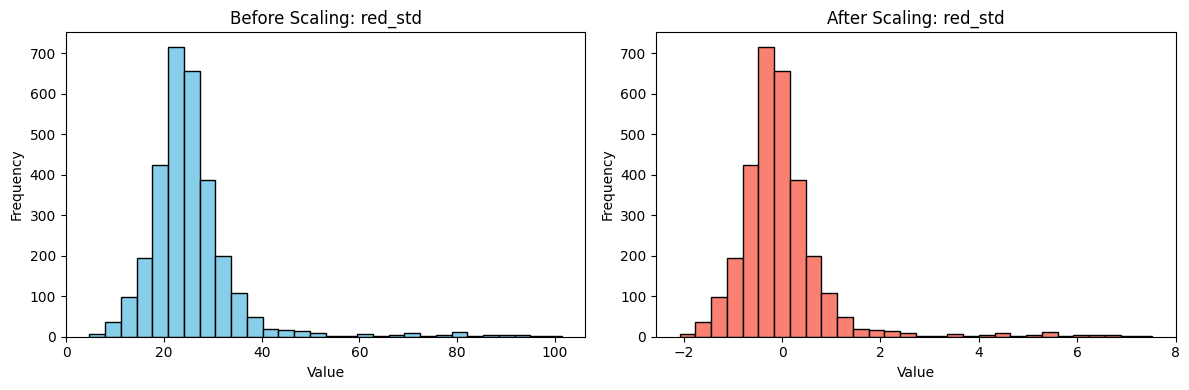

In [9]:
X.columns = X.columns.astype(str)

X_numeric = X.select_dtypes(include=['number'])

# Scale the numeric features
scaler = StandardScaler()
X_after_array = scaler.fit_transform(X_numeric)

# Convert scaled data back to DataFrame
X_after = pd.DataFrame(X_after_array, columns=X_numeric.columns)

feature_name = X_numeric.columns[23]  # or any index
plot_distribution_before_after(X_numeric, X_after, feature_name)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_after, y.values.ravel(), test_size=0.2, stratify=y, random_state=42)


In [13]:
X_train.head()

,blue_mean,blue_std,blue_median,blue_hist_0,blue_hist_1,blue_hist_2,blue_hist_3,blue_hist_4,blue_hist_5,blue_hist_6,...,red_std,red_median,red_hist_0,red_hist_1,red_hist_2,red_hist_3,red_hist_4,red_hist_5,red_hist_6,red_hist_7
2945,0.707063,-0.112281,0.711605,-0.146375,-0.180844,-0.239294,-0.401904,-1.096085,-0.823054,0.974063,...,-0.770612,0.023012,-0.199414,-1.087963,-1.513367,-1.113136,0.601221,1.813597,-1.166560,-0.276118
92,1.186419,-0.278872,1.230856,-0.146375,-0.180844,-0.239294,-0.401904,-0.506146,-1.789281,1.892827,...,-0.255107,1.774768,-0.196891,0.100456,-0.546144,-0.767795,-0.809729,-0.822823,0.918608,0.156628
827,-0.328764,-0.170802,-0.499981,-0.146375,-0.180844,-0.239294,-0.364693,0.721374,0.580738,-0.623757,...,-0.379015,-0.295489,-0.199414,-1.072011,0.853656,-0.144889,0.204918,-0.367619,0.352198,-0.158096
2675,-0.138704,-0.412298,-0.326897,-0.146375,-0.180844,-0.239294,-0.401904,-0.447292,0.728720,-0.657785,...,-1.407585,-0.613990,-0.199414,-1.087963,-1.513367,-1.206733,0.234430,-0.054996,0.366729,-0.311712
2995,1.511188,-0.215785,1.750107,-0.146375,-0.180844,-0.239294,-0.401904,-1.208187,-1.986138,2.160526,...,-1.008626,1.774768,-0.199414,-1.087963,-1.513367,-1.226098,-0.182953,0.058617,0.310640,0.051720


In [14]:
# 5. Base Classifier (KNN)
print("\n=== Base Classifier (KNN) ===")
knn = KNeighborsClassifier()  # it is using k = 5 by default !
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal', 'Non-Sperm']))


=== Base Classifier (KNN) ===
              precision    recall  f1-score   support

      Normal       0.57      0.69      0.62       204
    Abnormal       0.54      0.51      0.53       201
   Non-Sperm       0.86      0.72      0.79       195

    accuracy                           0.64       600
   macro avg       0.66      0.64      0.64       600
weighted avg       0.65      0.64      0.64       600



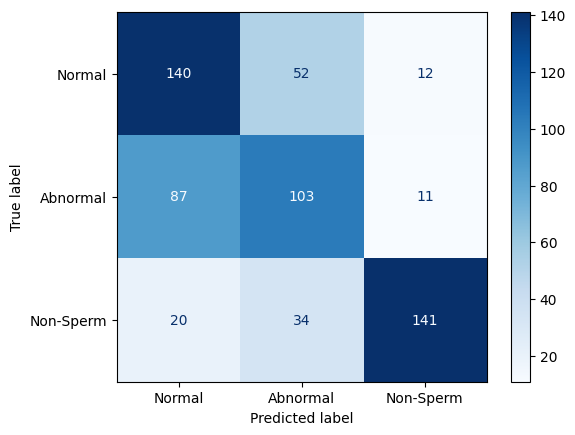

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Normal', 'Abnormal', 'Non-Sperm'], cmap='Blues')


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create the display
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['Normal', 'Abnormal', 'Non-Sperm'],
    cmap='Blues'
)


# Optional: adjust layout or title
plt.title("Confusion Matrix - KNN Classifier")
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrix_knn.png", dpi=300)  # You can also save as .jpg or .svg
plt.close()  # Close the plot if you don't want to display it immediately


In [16]:
from sklearn.feature_selection import SequentialFeatureSelector

In [26]:
n_feat_accuracy = {}

In [29]:
my_direction = 'forward'
n_import_feat_knn = [5, 10, 15, 20, 25, 29]
n_feat_accuracy = {}  # initialize dictionary

for value in n_import_feat_knn:
    sfs = SequentialFeatureSelector(
        knn,
        n_features_to_select=value,
        direction=my_direction,
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    
    sfs.fit(X_train, y_train)

    print(f"\n=== Base Classifier (KNN) - using {value} features and having sequential {my_direction} ===")
    
    knn = KNeighborsClassifier()
    knn.fit(X_train.loc[:, sfs.get_support()], y_train)
    y_pred = knn.predict(X_test.loc[:, sfs.get_support()])
    
    report = classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal', 'Non-Sperm'], output_dict=True)
    
    # FIXED: store accuracy using current feature count (value) as the key
    n_feat_accuracy[value] = report['accuracy']








=== Base Classifier (KNN) - using 5 features and having sequential forward ===

=== Base Classifier (KNN) - using 10 features and having sequential forward ===

=== Base Classifier (KNN) - using 15 features and having sequential forward ===

=== Base Classifier (KNN) - using 20 features and having sequential forward ===

=== Base Classifier (KNN) - using 25 features and having sequential forward ===

=== Base Classifier (KNN) - using 29 features and having sequential forward ===


In [30]:
n_feat_accuracy

{5: 0.6016666666666667,
 10: 0.6433333333333333,
 15: 0.6133333333333333,
 20: 0.6233333333333333,
 25: 0.6316666666666667,
 29: 0.6566666666666666}

In [19]:
selected_features = sfs.get_support()
selected_features

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False, False,  True, False, False,  True])

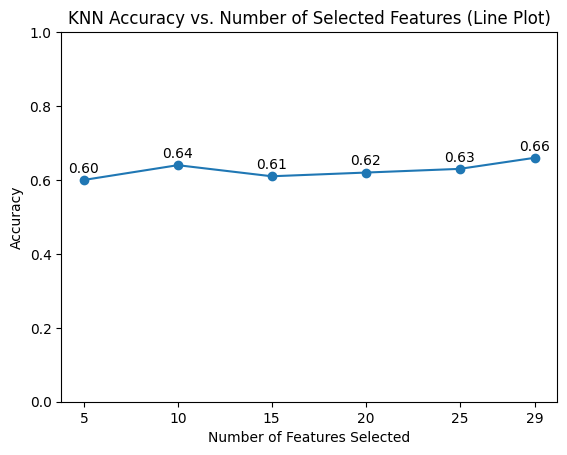

In [34]:
import matplotlib.pyplot as plt

# Rounded accuracy values
n_feat_accuracy = {
    5:  0.60,
    10: 0.64,
    15: 0.61,
    20: 0.62,
    25: 0.63,
    29: 0.66
}

# Prepare data
features = sorted(n_feat_accuracy.keys())
accuracies = [n_feat_accuracy[f] for f in features]

# Create line plot with markers
plt.figure()
plt.plot(features, accuracies, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(features)
plt.title("KNN Accuracy vs. Number of Selected Features (Line Plot)")

# Annotate each point with the rounded value
for x, y in zip(features, accuracies):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center')

# Save the figure to a file and display it
plt.savefig('knn_accuracy_line_plot.png', dpi=150, bbox_inches='tight')
plt.show()


In [20]:
selected_feature_names = X_train.columns[selected_features]

print("Features seleccionadas:", list(selected_feature_names))

Features seleccionadas: ['blue_std', 'blue_hist_0', 'blue_hist_1', 'blue_hist_2', 'blue_hist_3', 'blue_hist_4', 'blue_hist_5', 'blue_hist_6', 'blue_hist_7', 'green_std', 'green_hist_0', 'green_hist_1', 'green_hist_3', 'green_hist_4', 'green_hist_7', 'red_std', 'red_hist_0', 'red_hist_4', 'red_hist_7']


In [44]:
# after fitting…
# 1) get the selected feature names
try:
    selected = list(sfs.get_feature_names_out())
except AttributeError:
    # if you’re using mlxtend’s SFS, it doesn’t have get_feature_names_out()
    selected = list(sfs.k_feature_names_)

# 2) get all the original feature names
all_feats = X_train.columns.tolist()

# 3) compute the ones left out
left_out = [f for f in all_feats if f not in selected]

print("Selected features:", selected)
print("Left-out features:", left_out)


Selected features: ['blue_std', 'blue_hist_0', 'blue_hist_1', 'blue_hist_2', 'blue_hist_5', 'blue_hist_6', 'blue_hist_7', 'green_std', 'green_hist_3', 'green_hist_4', 'green_hist_7', 'red_std', 'red_hist_0', 'red_hist_4', 'red_hist_7']
Left-out features: ['blue_mean', 'blue_median', 'blue_hist_3', 'blue_hist_4', 'green_mean', 'green_median', 'green_hist_0', 'green_hist_1', 'green_hist_2', 'green_hist_5', 'green_hist_6', 'red_mean', 'red_median', 'red_hist_1', 'red_hist_2', 'red_hist_3', 'red_hist_5', 'red_hist_6']


In [21]:
print(f"\n=== Base Classifier (KNN) - using {n_import_feat_knn}  features and having sequential {my_direction}===")
knn = KNeighborsClassifier()  # it is using k = 5 by default 
knn.fit(X_train[selected_feature_names], y_train)
y_pred = knn.predict(X_test[selected_feature_names])
print(classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal', 'Non-Sperm']))


=== Base Classifier (KNN) - using 19  features and having sequential forward===
              precision    recall  f1-score   support

      Normal       0.56      0.66      0.61       204
    Abnormal       0.57      0.54      0.55       201
   Non-Sperm       0.84      0.73      0.78       195

    accuracy                           0.64       600
   macro avg       0.66      0.64      0.65       600
weighted avg       0.65      0.64      0.64       600



In [22]:
report = classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal', 'Non-Sperm'], output_dict=True)

In [23]:
accuracy_from_report = report['accuracy']
print("Accuracy (from report):", accuracy_from_report)

Accuracy (from report): 0.6416666666666667


In [24]:
n_feat_accuracy[n_import_feat_knn] = accuracy_from_report


In [25]:
n_feat_accuracy

{19: 0.6416666666666667}

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Generar el classification report como diccionario
report_dict = classification_report(
    y_test, y_pred, target_names=['Normal', 'Abnormal', 'Non-Sperm'], output_dict=True
)

# Convertir a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 4))  # Ajusta el tamaño si es necesario
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.round(2).values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center')

# Guardar la imagen
plt.title("Classification Report - KNN")
plt.savefig("classification_report_knn.png", dpi=300, bbox_inches='tight')
plt.close()


In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

my_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Normal', 'Abnormal', 'Non-Sperm'], cmap='Blues')

# Optional: adjust layout or title
plt.title("Confusion Matrix - KNN Classifier")
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrix33_knn.png", dpi=300)  # You can also save as .jpg or .svg
plt.close()  # Close the plot if you don't want to display it immediately
